                    Machine Learning with Regression Dataset (Daily Electric Energy Consumption)

Importing the necessary packages as usual and printing the head of the file.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
file = pd.read_csv("dee.csv")
file.head()

,Hydroelectric,Nuclear,Coal,Fuel,Gas,Special,Consume
0,179183.0,175973,78429.1,4680.73,8117.13,8023,1.732800
1,206035.0,186774,79129.5,4342.43,5715.18,8159,1.583500
2,198435.0,180633,64465.2,4566.84,0.00,8215,1.505310
3,187029.0,171382,51913.4,5342.54,0.00,8346,0.955205
4,199096.0,168691,126091.0,13155.70,24428.00,8525,1.879650


Now computing the Basic statistics of the features.

In [2]:
file.describe()

,Hydroelectric,Nuclear,Coal,Fuel,Gas,Special,Consume
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,102685.709589,156774.578082,181198.970411,19767.012333,38532.388827,11713.115068,2.971044
std,45668.326333,17811.546176,34026.736267,17537.588342,23167.507570,1937.849328,0.966452
min,27881.800000,114760.000000,33537.000000,0.000000,0.000000,5307.000000,0.765853
25%,63882.800000,145513.000000,168346.000000,6093.010000,19372.000000,10656.000000,2.175910
50%,96320.600000,161469.000000,191293.000000,14308.800000,37597.900000,11752.000000,2.787250
75%,141067.000000,171092.000000,205157.000000,28671.300000,58829.900000,13077.000000,3.883210
max,206035.000000,187105.000000,234833.000000,67986.500000,84452.200000,16357.000000,5.118750


Now plotting the target variable(ConcreteCompressiveStrength) against the other 8 features to find the relationship between them.

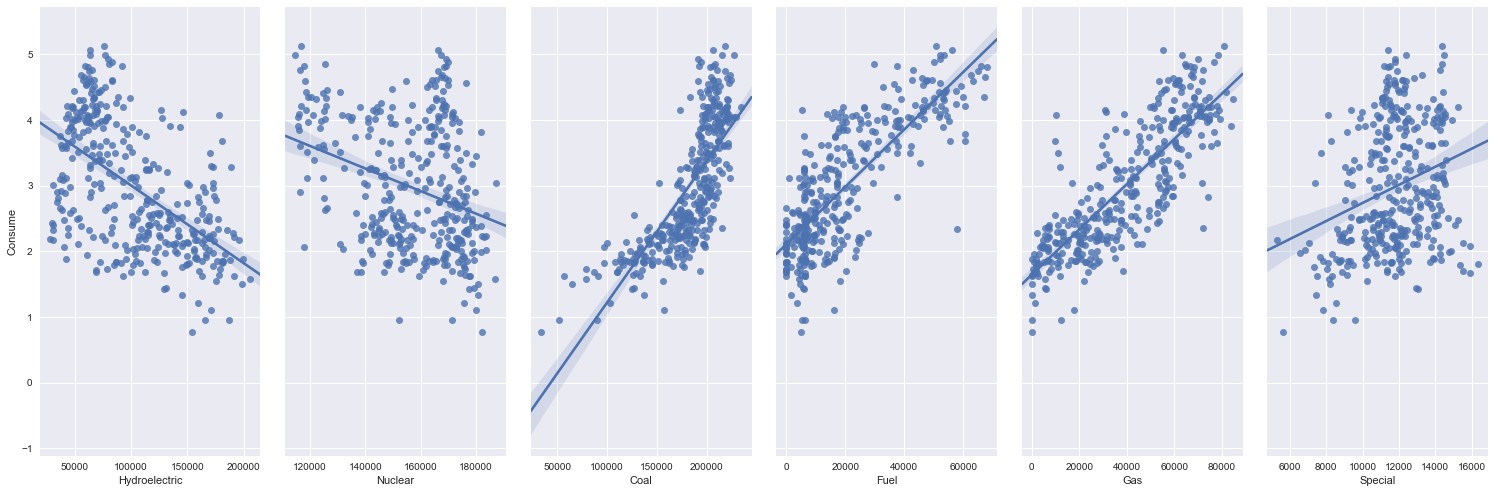

In [3]:
sns.pairplot(file,x_vars=['Hydroelectric','Nuclear','Coal','Fuel','Gas','Special'],y_vars='Consume',size=7,aspect=0.5,kind='reg')

Now, Splitting the features in X and target in Y variable.

In [4]:
X=file[['Hydroelectric','Nuclear','Coal','Fuel','Gas','Special']]
Y=file[['Consume']]
X.head()

,Hydroelectric,Nuclear,Coal,Fuel,Gas,Special
0,179183.0,175973,78429.1,4680.73,8117.13,8023
1,206035.0,186774,79129.5,4342.43,5715.18,8159
2,198435.0,180633,64465.2,4566.84,0.00,8215
3,187029.0,171382,51913.4,5342.54,0.00,8346
4,199096.0,168691,126091.0,13155.70,24428.00,8525


Now, using the cross validation we split the testing and training data set to perform the prediction.

In [6]:
from sklearn.cross_validation import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(292, 6)
(73, 6)
(292, 1)
(73, 1)


We perform the simple linear regression with the original dataset without omitting any feature from it and calculating its R2 score, MAE, MSE.

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_auc_score, r2_score, mean_absolute_error,mean_squared_error

clf = LinearRegression(normalize=True)
training = clf.fit(X_train,Y_train)
prediction = clf.predict(X_test)
print("R2 Score:",r2_score(Y_test,prediction))
print("Mean Absolute Error:",mean_absolute_error(Y_test,prediction))
print("Mean Squared Error:",mean_squared_error(Y_test,prediction))
print('Coefficients: \n', clf.coef_)
print("Intercept:",clf.intercept_)

R2 Score: 0.835420579744
Mean Absolute Error: 0.307057708957
Mean Squared Error: 0.142096954001
Coefficients: 
 [[ -4.22093642e-06  -3.52437093e-06   7.15626427e-06   2.55426648e-05
    7.39265314e-06  -1.47406161e-05]]
Intercept: [ 2.04827881]


Now, we use Lasso Regression (L1 Regularization ) which automatically omits the less significant features from the dataset and computes the R2 score, MSE, MAE.

In [8]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.5,random_state=42)
training = clf.fit(X_train,Y_train)
prediction = clf.predict(X_test)
print("R2 Score:",r2_score(Y_test,prediction))
print("Mean Absolute Error:",mean_absolute_error(Y_test,prediction))
print("Mean Squared Error:",mean_squared_error(Y_test,prediction))
print('Coefficients: \n', clf.coef_)
print("Intercept:",clf.intercept_)

R2 Score: 0.835460962074
Mean Absolute Error: 0.307025769385
Mean Squared Error: 0.142062088122
Coefficients: 
 [ -4.21881380e-06  -3.52332085e-06   7.15765828e-06   2.55481677e-05
   7.38428860e-06  -1.45526805e-05]
Intercept: [ 2.04564772]


Now, we use Decision Tree Regressor to compute the R2 score, MSE, MAE using the original dataset.

In [15]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_auc_score, r2_score, mean_absolute_error,mean_squared_error

clf = DecisionTreeRegressor(random_state=0)
training = clf.fit(X_train,Y_train)
prediction = clf.predict(X_test)
print("R2 Score:",r2_score(Y_test,prediction))
print("Mean Absolute Error:",mean_absolute_error(Y_test,prediction))
print("Mean Squared Error:",mean_squared_error(Y_test,prediction))

R2 Score: 0.608322498202
Mean Absolute Error: 0.430191123288
Mean Squared Error: 0.338172171644


So, we can boost the decision tree regressor using AdaBoostRegressor(with Original Dataset).

In [14]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
clf = AdaBoostRegressor(DecisionTreeRegressor(random_state=42))
training = clf.fit(X_train,Y_train)
prediction = clf.predict(X_test)
print("R2 Score:",r2_score(Y_test,prediction))
print("Mean Absolute Error:",mean_absolute_error(Y_test,prediction))
print("Mean Squared Error:",mean_squared_error(Y_test,prediction))

R2 Score: 0.799583489445
Mean Absolute Error: 0.332850849315
Mean Squared Error: 0.173038497991


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


So, we can also use decision tree regressor with GradientBoostingRegressor(with Original Dataset).

In [11]:
from sklearn.ensemble import GradientBoostingRegressor
clf = GradientBoostingRegressor()
training = clf.fit(X_train,Y_train)
prediction = clf.predict(X_test)
print("R2 Score:",r2_score(Y_test,prediction))
print("Mean Absolute Error:",mean_absolute_error(Y_test,prediction))
print("Mean Squared Error:",mean_squared_error(Y_test,prediction))

R2 Score: 0.816677637821
Mean Absolute Error: 0.304089249308
Mean Squared Error: 0.158279505574


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Finally another alternative for gradientBoostingRegressor is XGBRegressor. XGBoost- Xtreme Gradient Boosting is the implementation of the Boosted Gradient Decision Tree.

In [12]:
from xgboost import XGBRegressor
clf = XGBRegressor()
training = clf.fit(X_train,Y_train)
prediction = clf.predict(X_test)
print("R2 Score:",r2_score(Y_test,prediction))
print("Mean Absolute Error:",mean_absolute_error(Y_test,prediction))
print("Mean Squared Error:",mean_squared_error(Y_test,prediction))

R2 Score: 0.82205311563
Mean Absolute Error: 0.304689972483
Mean Squared Error: 0.153638348
